# Image restoration, Noise, Segmentation and Contours
>  So far, you have done some very cool things with your image processing skills! In this chapter, you will apply image restoration to remove objects, logos, text, or damaged areas in pictures! You will also learn how to apply noise, use segmentation to speed up processing, and find elements in images by their contours.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 3 exercises "Image Processing in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

## Image restoration

### Let's restore a damaged image

<div class=""><p>In this exercise, we'll restore an image that has missing parts in it, using the <code>inpaint_biharmonic()</code> function. </p>
<p></p><center>
  <img src="https://assets.datacamp.com/production/repositories/4470/datasets/7bb38f37b41f40b9ef2e59b81f326a5e038d69b8/damaged_astronaut.png" alt="Small cute puppy" width="20%">
</center>
<center>Loaded as <code>defect_image</code>.</center><p></p>
<p>We'll work on an image from the <code>data</code> module, obtained by <code>data.astronaut()</code>. Some of the pixels have been replaced by 1s using a binary mask, on purpose, to simulate a damaged image. Replacing pixels with 1s turns them totally black. The defective image is saved as an array called <code>defect_image</code>.</p>
<p>The mask is a black and white image with patches that have the position of the image bits that have been corrupted. We can apply the restoration function on these areas. This mask is preloaded as <code>mask</code>.</p>
<p>Remember that inpainting is the process of reconstructing lost or deteriorated parts of images and videos.</p></div>

In [6]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)    
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/defect_image.jpg
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/mask.npz
defect_image = plt.imread('defect_image.jpg')
mask = np.load('mask.npz')
mask = mask.f.arr_0

Instructions 1/3
<li>Import the <code>inpaint</code> function in the <code>restoration</code> module in scikit-image (<code>skimage</code>).</li>

In [ ]:
# Import the module from restoration
from skimage.restoration import inpaint

Instructions 2/3
<div class="exercise--instructions exercise--typography"><div class="exercise--instructions__content"><ul>
<li>Show the defective image using <code>show_image()</code>.</li>
</ul></div><div style="margin: 16px -15px 0px;"><section class="dc-sct-feedback" tabindex="-1"><div></div><nav class="dc-sct-feedback__nav"><ul class="dc-sct-feedback__tab-list"></ul></nav></section></div></div>

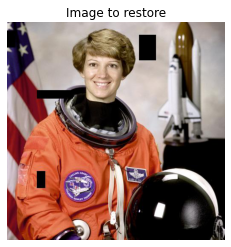

In [ ]:
# Show the defective image
show_image(defect_image, 'Image to restore')

Instructions 3/3
<li>Call the correct function from <code>inpaint</code>. Use the corrupted image as the first parameter, then the mask and multichannel boolean.</li>

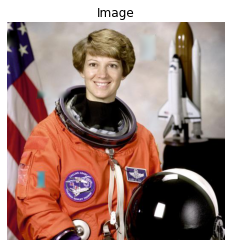

In [ ]:
# Apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)
show_image(restored_image)

**You restored the image successfully. The image looks a lot better now. You can handle colored images that have several missing areas.**

### Removing logos

<div class=""><p>As we saw in the video, another use of image restoration is removing objects from an scene. In this exercise, we'll remove the Datacamp logo from an image.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/3fabad1e29879cba6fe5c0cb7d47d41cf9141437/4.2.06_w_logo_2_2.png" alt="Landscape with small datacamp logo">
  <br>
<em>Image loaded as <code>image_with_logo</code>.</em>
</center><p></p>
<p>You will create and set the mask to be able to erase the logo by inpainting this area. </p>
<p>Remember that when you want to remove an object from an image you can either manually delineate that object or run some image analysis algorithm to find it.</p></div>

In [ ]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/image_with_logo.jpg
image_with_logo = plt.imread('image_with_logo.jpg')

Instructions
<ul>
<li>Initialize a mask with the same shape as the image, using <code>np.zeros()</code>.</li>
<li>In the mask, set the region that will be inpainted to 1 .</li>
<li>Apply inpainting to <code>image_with_logo</code> using the <code>mask</code>.</li>
</ul>

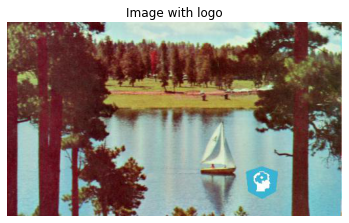

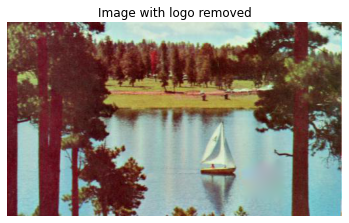

In [ ]:
# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:272, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                  mask,
                                  multichannel=True)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')
show_image(image_logo_removed, 'Image with logo removed')

## Noise

### Let's make some noise!

<div class=""><p>In this exercise, we'll practice adding noise to a fruit image.</p>
<p></p><center>
    <img src="https://assets.datacamp.com/production/repositories/4470/datasets/b21f1547950fbfdde7c48643a706db0d158aac3b/fruits_square.jpg" alt="Various fruits" width="25%">
</center>
<center>
  Image preloaded as <code>fruit_image</code>.
</center><p></p></div>

In [ ]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/fruit_image.jpg
fruit_image = plt.imread('fruit_image.jpg')

Instructions
<ul>
<li>Import the <code>util</code> module and the random noise function.</li>
<li>Add noise to the image.</li>
<li>Show the original and resulting image.</li>
</ul>

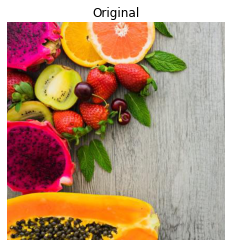

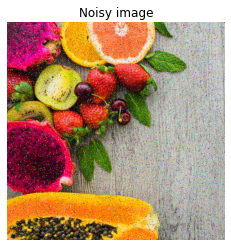

In [ ]:
# Import the module and function
from skimage.util import random_noise

# Add noise to the image
noisy_image = random_noise(fruit_image, mode='s&p')

# Show original and resulting image
show_image(fruit_image, 'Original')
show_image(noisy_image, 'Noisy image')

### Reducing noise

<div class=""><p>We have a noisy image that we want to improve by removing the noise in it. </p>
<p></p><center>
  <img src="https://assets.datacamp.com/production/repositories/4470/datasets/856da76937ad35d3bb407d4f2e8ad7c26e40edac/miny.jpeg" alt="Small cute puppy" width="25%">
</center>
<center>Preloaded as <code>noisy_image</code>.</center><p></p>
<p>Use total variation filter denoising to accomplish this.</p></div>

In [ ]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/miny.jpeg
noisy_image = plt.imread('miny.jpeg')

Instructions
<ul>
<li>Import the <code>denoise_tv_chambolle</code> function from its module.</li>
<li>Apply total variation filter denoising.</li>
<li>Show the original noisy and the resulting denoised image.</li>
</ul>

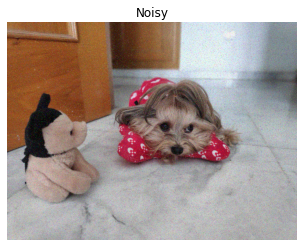

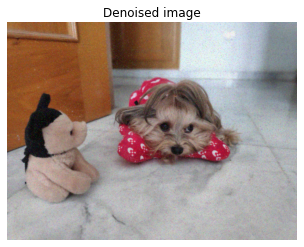

In [ ]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle

noisy_image = random_noise(noisy_image, mode='s&p')
# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image,
                                      multichannel=True)

# Show the noisy and denoised images
show_image(noisy_image, 'Noisy')
show_image(denoised_image, 'Denoised image')

### Reducing noise while preserving edges

<div class=""><p>In this exercise, you will reduce the noise in this landscape picture.</p>
<p></p><center>
  <img src="https://assets.datacamp.com/production/repositories/4470/datasets/68eed92ae8b528be511a7b0b7734e04b5c0f2da8/noise-noisy-nature.jpg" alt="Landscape of a river" width="35%">
</center>
<center>Preloaded as <code>landscape_image</code>.</center><p></p>
<p>Since we prefer to preserve the edges in the image, we'll use the bilateral denoising filter.</p></div>

In [ ]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/landscape_image.jpg
landscape_image = plt.imread('landscape_image.jpg')

Instructions
<ul>
<li>Import the <code>denoise_bilateral</code> function from its module.</li>
<li>Apply bilateral filter denoising.</li>
<li>Show the original noisy and the resulting denoised image.</li>
</ul>

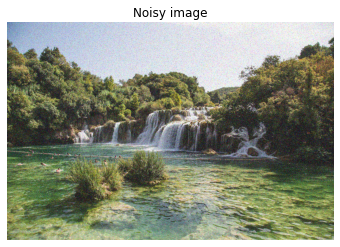

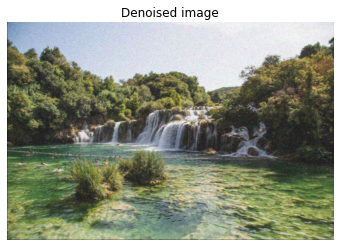

In [ ]:
# Import bilateral denoising function
from skimage.restoration import denoise_bilateral

landscape_image = random_noise(landscape_image, mode='s&p')
# Apply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image, 
                                   multichannel=True)

# Show original and resulting images
show_image(landscape_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')

## Superpixels & segmentation

<div class=""><p>Let's calculate the total number of pixels in this image.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/75e40e05b19b2fdde5784eafced8125c8dccb674/chinese.jpg" alt="Young woman">
</center>
<center>Image preloaded as <code>face_image</code></center><p></p>
<p>The total amount of pixel is its resolution. Given by <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="0" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D43B TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D452 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D456 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D454 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c210E TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D461 TEX-I"></mjx-c></mjx-mi><mjx-mo class="mjx-n" space="3"><mjx-c class="mjx-cD7"></mjx-c></mjx-mo><mjx-mi class="mjx-i" space="3"><mjx-c class="mjx-c1D44A TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D456 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D451 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D461 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c210E TEX-I"></mjx-c></mjx-mi></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>H</mi><mi>e</mi><mi>i</mi><mi>g</mi><mi>h</mi><mi>t</mi><mo>×</mo><mi>W</mi><mi>i</mi><mi>d</mi><mi>t</mi><mi>h</mi></math></mjx-assistive-mml></mjx-container>.</p>
<p>Use <code>.shape</code> from NumPy which is preloaded as <code>np</code>, in the console to check the width and height of the image.</p></div>

In [4]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/face_image.jpg
face_image = plt.imread('face_image.jpg')

In [5]:
face_image.shape

(265, 191, 3)

<pre>
Possible Answers

face_image is 191 * 191 = 36,481 pixels

<b>face_image is 265 * 191 = 50,615 pixels</b>

face_image is 1265 * 1191 = 1,506,615 pixels

face_image is 2265 * 2191 = 4,962,615 pixels
</pre>

**The image is 50,615 pixels in total.**

### Superpixel segmentation

<div class=""><p>In this exercise, you will apply unsupervised segmentation to the same image, before it's passed to a face detection machine learning model. </p>
<p>So you will reduce this image from <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="1" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-mn class="mjx-n"><mjx-c class="mjx-c32"></mjx-c><mjx-c class="mjx-c36"></mjx-c><mjx-c class="mjx-c35"></mjx-c></mjx-mn><mjx-mo class="mjx-n" space="3"><mjx-c class="mjx-cD7"></mjx-c></mjx-mo><mjx-mn class="mjx-n" space="3"><mjx-c class="mjx-c31"></mjx-c><mjx-c class="mjx-c39"></mjx-c><mjx-c class="mjx-c31"></mjx-c></mjx-mn><mjx-mo class="mjx-n" space="4"><mjx-c class="mjx-c3D"></mjx-c></mjx-mo><mjx-mn class="mjx-n" space="4"><mjx-c class="mjx-c35"></mjx-c><mjx-c class="mjx-c30"></mjx-c></mjx-mn><mjx-mo class="mjx-n"><mjx-c class="mjx-c2C"></mjx-c></mjx-mo><mjx-mn class="mjx-n" space="2"><mjx-c class="mjx-c36"></mjx-c><mjx-c class="mjx-c31"></mjx-c><mjx-c class="mjx-c35"></mjx-c></mjx-mn></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><mn>265</mn><mo>×</mo><mn>191</mn><mo>=</mo><mn>50</mn><mo>,</mo><mn>615</mn></math></mjx-assistive-mml></mjx-container> pixels down to <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="2" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-mn class="mjx-n"><mjx-c class="mjx-c34"></mjx-c><mjx-c class="mjx-c30"></mjx-c><mjx-c class="mjx-c30"></mjx-c></mjx-mn></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><mn>400</mn></math></mjx-assistive-mml></mjx-container> regions.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/75e40e05b19b2fdde5784eafced8125c8dccb674/chinese.jpg" alt="Young woman">
</center>
<center>Already preloaded as <code>face_image</code>.</center><p></p>
<p>The <code>show_image()</code> function has been preloaded for you as well.</p></div>

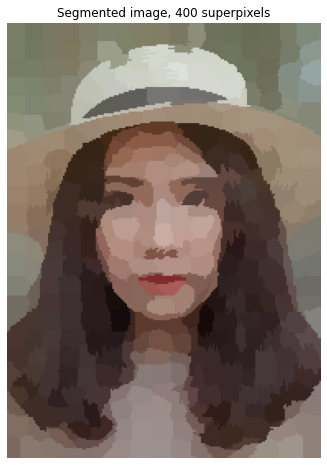

In [7]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments= 400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
show_image(segmented_image, "Segmented image, 400 superpixels")

**You reduced the image from 50,615 pixels to 400 regions! Much more computationally efficient for, for example, face detection machine learning models.**

## Finding contours

<div class=""><p>In this exercise we'll find the contour of a horse. </p>
<p>For that we will make use of a <strong>binarized</strong> image provided by scikit-image in its <code>data</code> module. Binarized images are easier to process when finding contours with this algorithm. Remember that contour finding only supports 2D image arrays.</p>
<p>Once the contour is detected, we will display it together with the original image. That way we can check if our analysis was correct!</p>
<p><code>show_image_contour(image, contours)</code> is a preloaded function that displays the image with all contours found using Matplotlib.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/bf29f676bb5dfd3e6d7d44774046213ba82f6092/horse.png" alt="Shape of a horse in black and white">
</center><p></p>
<p>Remember you can use the <code>find_contours()</code> function from the measure module, by passing the thresholded image and a constant value.</p></div>

In [37]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

Instructions
<ul>
<li>Import the data and the module needed for contouring detection.</li>
<li>Obtain the horse image shown in the context area.</li>
<li>Find the contours of the horse image using a constant level value of 0.8.</li>
</ul>

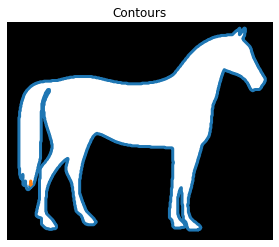

In [3]:
# Import the modules
from skimage import measure, data

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, 0.8)

# Shows the image with contours found
show_image_contour(horse_image, contours)

**You were able to find the horse contours! In the next exercise you will do some image preparation first and binarize the image yourself before finding the contours.**

### Find contours of an image that is not binary

<div class=""><p>Let's work a bit more on how to prepare an image to be able to find its contours and extract information from it.</p>
<p>We'll process an image of two purple dice loaded as <code>image_dice</code> and determine what number was rolled for each dice.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4470/datasets/b9bcf87a160d32d41517c9dc9429cc6b7ec10ac5/dices.png" alt="Purple dice">
</center><p></p>
<p>In this case, the image is not grayscale or binary yet. This means we need to perform some image pre-processing steps before looking for the contours. First, we'll transform the image to a 2D array grayscale image and next apply thresholding. Finally, the contours are displayed together with the original image.</p>
<p><code>color</code>, <code>measure</code> and <code>filters</code> modules are already imported so you can use the functions to find contours and apply thresholding.</p>
<p>We also import <code>io</code> module to load the <code>image_dice</code> from local memory, using <code>imread</code>. <a href="https://scikit-image.org/docs/dev/api/skimage.io.html" target="_blank" rel="noopener noreferrer">Read more here.</a></p></div>

In [41]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=5, color='green')
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

In [31]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/dices.png
dices = plt.imread('dices.png')
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage import color
image_dice = imread('dices.png')

Instructions 1/4
<li>Transform the image to grayscale using <code>rgb2gray()</code>.</li>

In [32]:
# Make the image grayscale
image_dice = color.rgb2gray(image_dice)

Instructions 2/4
<li>Obtain the optimal threshold value for the image and set it as <code>thresh</code>.</li>

In [33]:
# Obtain the optimal thresh value
thresh = threshold_otsu(image_dice)

Instructions 3/4
<li>Apply thresholding to the image once you have the optimal threshold value <code>thresh</code>, using the corresponding operator.</li>

In [34]:
# Apply thresholding
binary = image_dice > thresh

Instructions 4/4
<li>Apply the corresponding function to obtain the contours and use a value level of 0.8.</li>

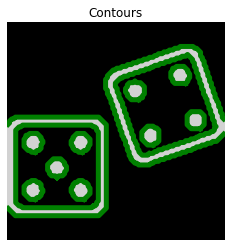

In [40]:
# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)

# Show the image
show_image_contour(image_dice, contours)

**You made the image a 2D array by slicing, applied thresholding and succesfully found the contour. Now you can apply it to any image you work on in the future.**

### Count the dots in a dice's image

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Count the dots in a dice's image</h1><div class=""><p>Now we have found the contours, we can extract information from it.</p>
<p>In the previous exercise, we prepared a purple dices image to find its contours:</p>
<p><img src="https://assets.datacamp.com/production/repositories/4470/datasets/df705f14053818899a6f483c8e53fb3d9035a118/steps_contours.png" alt="3 images showing the steps to find contours"></p>
<p>This time we'll determine what number was rolled for the dice, by counting the dots in the image.</p>
<p>The contours found in the previous exercise are preloaded as <code>contours</code>.</p>
<p>Create a list with all contour's shapes as <code>shape_contours</code>. You can see all the contours shapes by calling <code>shape_contours</code> in the console, once you have created it.</p>
<p>Check that most of the contours aren't bigger in size than 50. If you count them, they are the exact number of dots in the image.</p>
<p><code>show_image_contour(image, contours)</code> is a preloaded function that displays the image with all contours found using Matplotlib.</p></div></div>

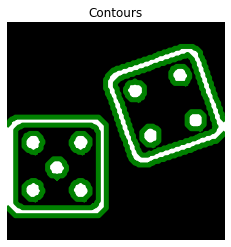

Dice's dots number: 9. 


In [42]:
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))

**You calculated the dice's number in the image by classifing its contours.**